<a href="https://colab.research.google.com/github/talorsabatani/machine-learning/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#My Details
Name: Talor Sabatani  
Link:   https://www.kaggle.com/talorsabatani

# Titanic, in full Royal Mail Ship (RMS) Titanic
British luxury passenger liner that sank on April 14–15, 1912, during its maiden voyage, en route to New York City from Southampton, England, killing about 1,500 (see Researcher’s Note: Titanic) passengers and ship personnel. One of the most famous tragedies in modern history, it inspired numerous stories, several films, and a musical and has been the subject of much scholarship and scientific speculation.

![titanicclem](https://user-images.githubusercontent.com/49269120/99374548-5b4a4c00-28cb-11eb-85f5-d35e78075d5e.jpg)




*read more:* 
[britannica.com/topic/International-Ice-Patrol](https://) 








---










#Competition
**Goal**  
It is your job to predict if a passenger survived the sinking of the Titanic or not.
Your score is the percentage of passengers you correctly predict. This is known as accuracy.


# **Let's analyze and see what we have here**


Content:
1.   Load and check data
1.   Missing value
2.   Visualization and Feature Relations
2.   Correlation between feature in a Heatmap
1.   Classification
1.   My submission
1.   References




# Imports

In [78]:
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import model_selection
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["figure.figsize"] = (20,10)

#1. Load and check data

---



##Loading Datasets⏳

Let's take a look at the data we have.


In [79]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

 
**Data Description**

---


🟣 `Train.csv` will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.  
🟢 The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

**Variable Description**  


---


  1.   PassengerId: unique id number to each passenger  
  1.   Survived: passenger survive(1) or died(0)
  2.   Pclass: passenger class  
  1.   Name: name
  2.   Sex: gender of passengers 
  1.   Age: age of passengers  
  1.   SibSp: number of siblings/spouses
  2.   Parch: number of parents/children   
  2.   Ticket: ticket number  
  2.   Fare: amount of money spent on ticket  
  2.   Cabin: cabin category    
  2.   Embarked: port where passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)





 

  
 

  




  
  


In [80]:
print ("The train data:")
print (train_df.info())
print ("\nThe test data:")
print (test_df.info())

The train data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

The test data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  

Conclusions:

*   These data sets's feature have unequal amount of data entries for every column and they have many different types of variables.   
This can happen for the missing values in our features, alphanumerical or text features. 

*   The test set does not provide passengers survival feature.  
 We are going to predict passenger survival status.




Let's get a better perspective of the dataset through this visualization.  https://public.tableau.com/profile/masum.rumi#!/vizhome/Titanic_data_mining/Dashboard1

#2. Missing values🎩

---

We find out that small part of the data is missing.  
It doesn't excite us, because we are going to predict them together **😎**


###🟣 Missing values in **train** dataset


---

In [81]:
#missing columns
train_df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

As you can see there are missing values in the   
~Age  
~Cabin  
~Embarked  

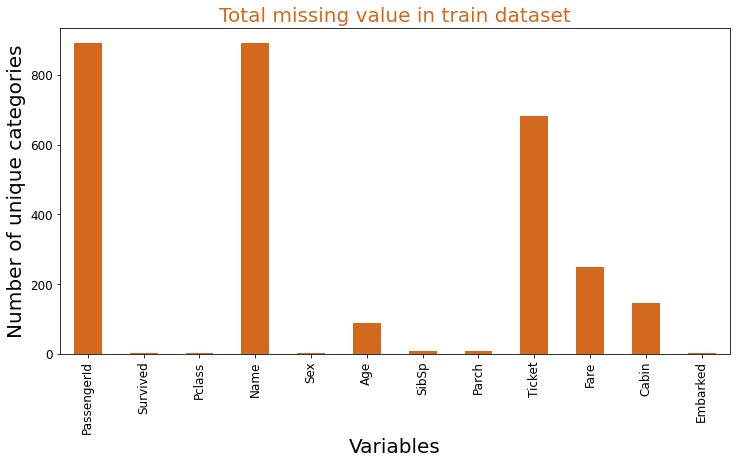

In [82]:
train_df.nunique().plot.bar(figsize=(12,6),fontsize=12, color ='chocolate')
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Total missing value in train dataset', fontsize=20, color='chocolate');

It's not so clear to see the missing values in this visualization.  
Probably because that few features are missing ,it's difficult to discern this representation.  
Therefore we will calculate the values in the table

Total missing values and missing percentage in **train** dataset:




In [83]:
def missing_percentage(df):
  total = df.isnull().sum().sort_values(ascending = False)
  percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
  return pd.concat([total, percent], axis=1, keys=['Total','Percent']) 

In [84]:
missing_percentage(train_df)

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


###🟢 Missing values in **test** dataset

---

 


In [85]:
#missing columns
test_df.isna().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

Missing values in **test** dataset.

As you can see there are missing values in the   
~Age  
~Cabin  
~Fare  


In [86]:
missing_percentage(test_df)

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


### In conclusionת we have 4 features with missing in the data train and data test   
**a.** Embarked   (🟣train)   
**b.** Age   (both 🟣train & 🟢test)   
**c.** Cabin    (both 🟣train & 🟢test)   
**d.** Fare  (**🟢test**)  


#**Part 2: Let's deal with these missing values**

---





### **2a.🟣 Embarked feature** - missing in the train *dataset*


---




In [87]:
def embarked_perecent_missing(df):
  return str(df.Embarked.isnull().sum()/len(df.Age)*100)
def embarked_count_missing(df):
  return str(df.Embarked.isnull().sum())
print("Train Embarked missing: " + embarked_perecent_missing(train_df) + "%")
print("There are " + str(train_df.Embarked.isnull().sum()) + " missing values")

Train Embarked missing: 0.22446689113355783%
There are 2 missing values


We have only 2 null values (0.22%) in the train dataset 

In [88]:
#finds the percentage of the value_counts
percent = pd.DataFrame(round(train_df.loc[:,'Embarked'].value_counts(dropna=False, normalize=True)*100,2))
total = pd.DataFrame(train_df.loc[:,'Embarked'].value_counts(dropna=False))
total.columns = ["Total"]
percent.columns = ['Percent']
print('NON UNIQE VALUES   -total and percent')
pd.concat([total, percent], axis = 1)

NON UNIQE VALUES   -total and percent


,Total,Percent
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


Let's check who these two passengers with the null values and what we can deduce from them

In [89]:
train_df[train_df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


We find a common denominator for two passengers.  
Both passengers ***servivrd***, belong to ***first class***, ***cabin*** B28, ***female***, paid a ***fare*** of $80 and they have the same ***ticket number***.
According to the data analysis, I assume that there have a family connection between them (Maybe mother and daughter or sisters).  
  



  

Let's see the combine between the **price of the ticket, embarked and sex.**

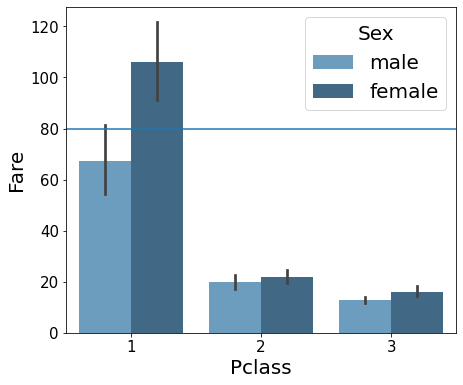

In [90]:
plt.figure(figsize=(7,6))
g = sns.barplot(x='Pclass' ,y='Fare', hue='Sex', data=train_df, palette="Blues_d",  )
plt.axhline(y=80);


We can conclude in this case that a female who bought a ticket for $80, she probably belong to the first class

In [91]:
pd.pivot_table(train_df, values='Survived', index=['Pclass', 'Embarked' ], columns='Sex')

Sex                female      male
Pclass Embarked                    
1      C         0.976744  0.404762
       Q         1.000000  0.000000
       S         0.958333  0.354430
2      C         1.000000  0.200000
       Q         1.000000  0.000000
       S         0.910448  0.154639
3      C         0.652174  0.232558
       Q         0.727273  0.076923
       S         0.375000  0.128302

We expose the average for a women in first class may be in the **C** embarked values.

So, let's fill in the missing values as "C"

In [92]:
## Replacing the null values in the Embarked column with the mode. 
train_df.Embarked.fillna("C", inplace=True)
train_df.Embarked.isna().any()

False

💭Another thing I would like to change is the family connection between these two women.
Later in the program I will check the passengers with the same ticket number and attach them in family connection.

### **2b.🟣🟢 Age feature** -missing in the train and the test

---




In [93]:
def Age_perecent_missing(df):
  return str(df.Age.isnull().sum()/len(df.Age)*100)
print("Train Age missing: " + Age_perecent_missing(train_df) + "%")
print("Test Age missing: " + Age_perecent_missing(test_df) + "%")

Train Age missing: 19.865319865319865%
Test Age missing: 20.574162679425836%


We will keep the age column unchanged for now, we will deal with this later.

### **2c.🟣🟢 Cabin feature** - missing in the train  and the test

---




In [94]:
def cabin_perecent_missing(df):
  return str(df.Cabin.isnull().sum()/len(df.Cabin)*100)
print("Train Cabin missing: " + cabin_perecent_missing(train_df) + "%")
print("Test Cabin missing: " + cabin_perecent_missing(test_df) + "%")


Train Cabin missing: 77.10437710437711%
Test Cabin missing: 78.22966507177034%


Cabin feature missing 77%  of the training data and 78% of the test data.   
A lot of NaN values and also many passengers have multiple cabins.   
So this is a useless feature.

In [95]:
train_df.drop(['Cabin'],axis=1,inplace=True)
test_df.drop(['Cabin'],axis=1,inplace=True)

### **2.d 🟢Fare feature** - missing in the test

---



In [96]:
def fare_perecent_missing(df):
  return str(df.Fare.isnull().sum()/len(df.Fare)*100)
print("Train Fare missing: " + fare_perecent_missing(train_df) + "%")
print("Test Fare missing: " + fare_perecent_missing(test_df) + "%")

Train Fare missing: 0.0%
Test Fare missing: 0.23923444976076555%


Fare feature missing 0.24% of the test data.  
We will keep the Fare column unchanged for now, we will deal with this later.

#3. Visualization and Feature Relations👁

---
Before we dive into finding relations between independent variables and our dependent variable(survivor), let us create some assumptions about how the relations may turn-out among features.

*Assumptions:*

*a. Gender*: More female survived than male  
*b. Pclass*: Higher socio-economic status passenger survived more than others.    
*c.  Fare*: Passenger with higher fare survived more that other passengers. This can be quite correlated with Pclass.     
*d.  Age:* Younger passenger survived more than other passengers. 
*e. SibSp* and Survived

Now, let's see how the features are related to each other by creating some visualizations.  




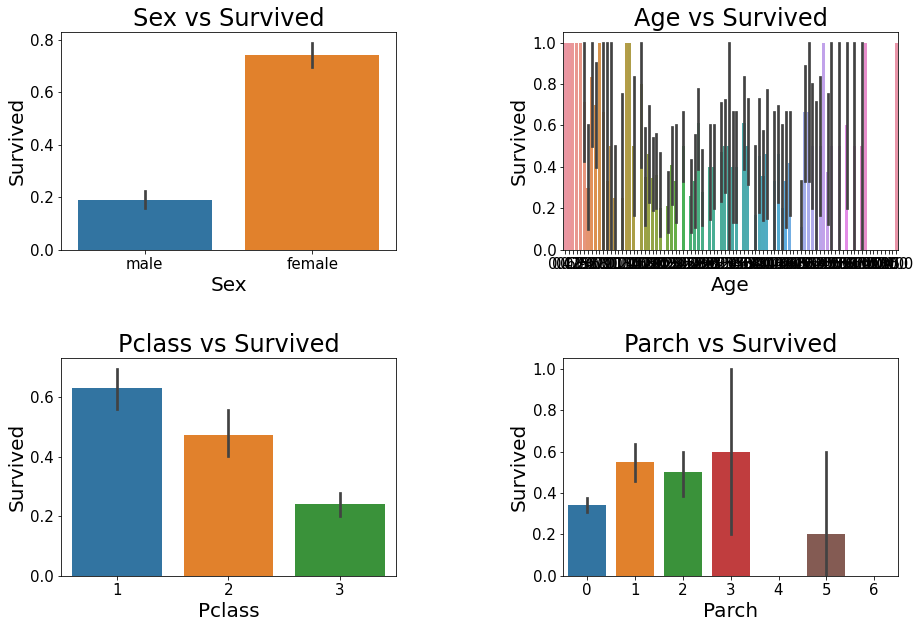

In [77]:
f,ax=plt.subplots(2,2,figsize=(15,10) )
sns.barplot('Sex', 'Survived',data=train_df,ax=ax[0,0])
ax[0,0].set_title('Sex vs Survived')

sns.barplot('Age', 'Survived',data=train_df,ax=ax[0,1])
ax[1,0].set_title('Pclass vs Survived')

sns.barplot('Pclass','Survived',data=train_df,ax=ax[1,0])
ax[0,1].set_title('Age vs Survived')

sns.barplot('Parch','Survived',data=train_df,ax=ax[1,1], )
ax[1,1].set_title('Parch vs Survived')

plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.show()

##**3a. Gender and Survived**



---



In [97]:
survived_Sex_rate = train_df.groupby(['Sex']).mean()[['Survived']]
male_rate = survived_Sex_rate.loc['male']
female_rate = survived_Sex_rate.loc['female']
display(survived_Sex_rate)

,Survived
Sex,
female,0.742038
male,0.188908


We found that 74.2% female passenger survived while only 18.9% male passenger survived.

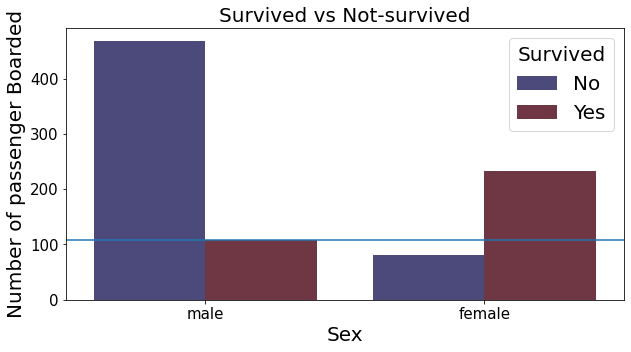

In [98]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = "Sex", hue="Survived", data = train_df, linewidth=8, palette = 'icefire')

plt.title("Survived vs Not-survived", fontsize = 20)
plt.xlabel("Sex", fontsize = 20);
plt.ylabel("Number of passenger Boarded", fontsize = 20)
leg = ax.get_legend()
plt.axhline(y=len(train_df[(train_df['Sex']=='male') & (train_df['Survived']==1)]))
# leg
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")


“Women and children first”  
In 1912 the captain explicitly issued an order for women and children to be saved first. As a result, the survival rate for women was three times higher than for men.

*Read more:* https://www.newscientist.com/article/dn22119-sinking-the-titanic-women-and-children-first-myth/#ixzz6e2kYYj5E

We can see that more men survived than women.  
Only 18.9% of the men on board survived, compared to 74.2% of the women.   
There were a lot more men on board than women.






###**3b. Pclass, embarked and Survived**



---



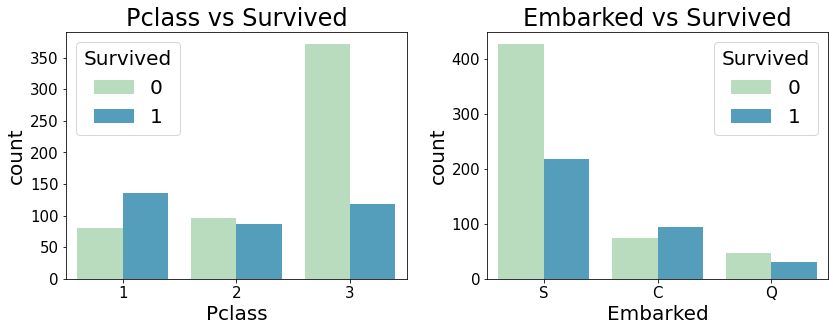

In [99]:
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.countplot(x='Pclass', hue='Survived',data=train_df,ax=ax[0], palette='GnBu')
ax[0].set_title('Pclass vs Survived')
sns.countplot(x='Embarked',hue='Survived',data=train_df,ax=ax[1], palette='GnBu')
ax[1].set_title('Embarked vs Survived')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.tight_layout()
plt.show()

In [100]:
pd.pivot_table(train_df, values='Survived', index=['Pclass', 'Embarked'], columns='Sex')

Sex                female      male
Pclass Embarked                    
1      C         0.977778  0.404762
       Q         1.000000  0.000000
       S         0.958333  0.354430
2      C         1.000000  0.200000
       Q         1.000000  0.000000
       S         0.910448  0.154639
3      C         0.652174  0.232558
       Q         0.727273  0.076923
       S         0.375000  0.128302

**Conclusions**:  
~Barely male from embarked **Q** survived  
~More **female** survived than male  
~The highest percentage of survivors were female from **class 1 and class 2**


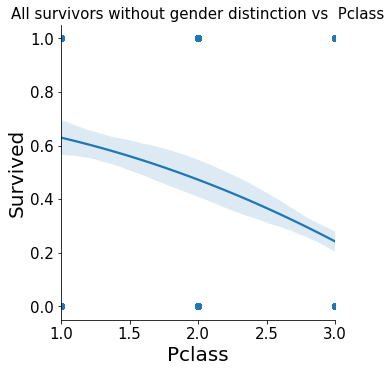

In [101]:
sns.lmplot(x="Pclass", y="Survived", data=train_df, order=2)
plt.ylabel('Survived')
plt.xlabel('Pclass')
plt.title('All survivors without gender distinction vs  Pclass', fontsize = 15)
plt.show()

*Negative correlation*  
The plot shows that passengers from the first-class have a higher survival rate more than passengers from other classes. The first class passengers had the upper hand during the tragedy.

###**3c. Fare and Survived**



---



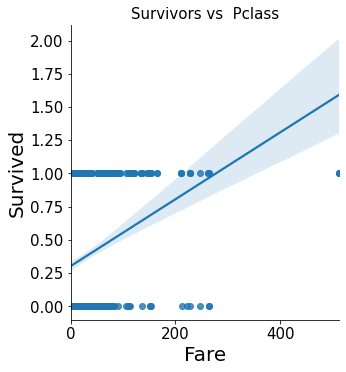

In [102]:
sns.lmplot(x="Fare", y="Survived", data=train_df, order=1)
plt.ylabel('Survived')
plt.xlabel('Fare')
plt.title('Survivors vs  Pclass', fontsize = 15)
plt.show()

*Positive correlation*  
Assuming that for a better class the passengers paid more.  
And as I said before the first class passengers had the upper hand during the tragedy.

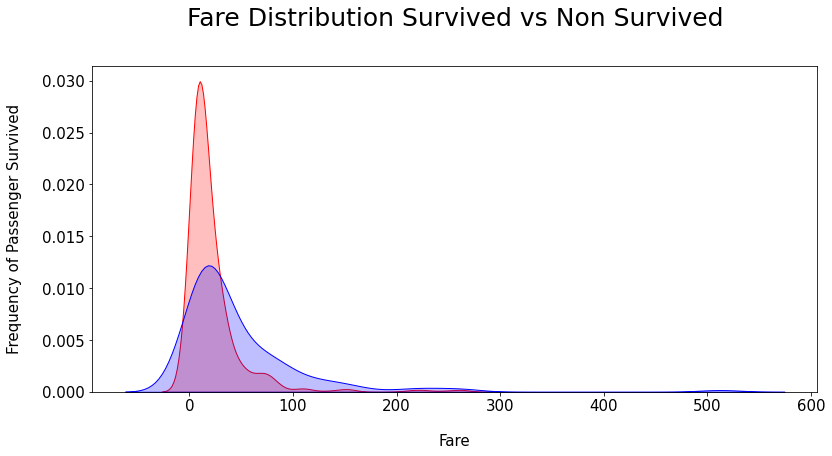

In [103]:
fig = plt.figure(figsize=(13,6))
ax=sns.kdeplot(train_df.loc[(train_df['Survived'] == 0),'Fare'] , color='r',shade=True,label='not survived')
ax=sns.kdeplot(train_df.loc[(train_df['Survived'] == 1),'Fare'] , color='b',shade=True, label='survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Fare", fontsize = 15, labelpad = 20)
plt.show()

In [104]:
def convert_fare(df):
  df['Fare_band']=0
  df.loc[df['Fare']<=7.775,'Fare_band']=0
  df.loc[(df['Fare']>7.775)&(df['Fare']<=8.662),'Fare_band']=1
  df.loc[(df['Fare']>8.662)&(df['Fare']<=14.454),'Fare_band']=2
  df.loc[(df['Fare']>14.454)&(df['Fare']<=26.0),'Fare_band']=3
  df.loc[(df['Fare']>26.0)&(df['Fare']<=52.369),'Fare_band']=4
  df.loc[df['Fare']>52.369,'Fare_band']=5

convert_fare(train_df)
convert_fare(test_df)

train_df.drop(['Fare'], axis=1, inplace=True)
test_df.drop(['Fare'], axis=1, inplace=True)

The spike in the plot under 100$ , the red shade represents that a lot of passengers who bought the ticket within that range did not survive.

###**3d. Age and Survived**



---



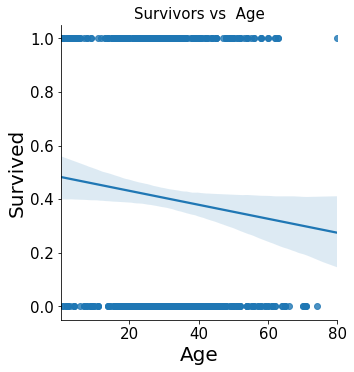

In [105]:
sns.lmplot(x="Age", y="Survived", data=train_df, order=1)
plt.ylabel('Survived')
plt.xlabel('Age')
plt.title('Survivors vs  Age', fontsize = 15)
plt.show()

In [106]:
test_df.isna().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Embarked       False
Fare_band      False
dtype: bool

*Negative correlation*  
Young passengers survived more than the older passengers.

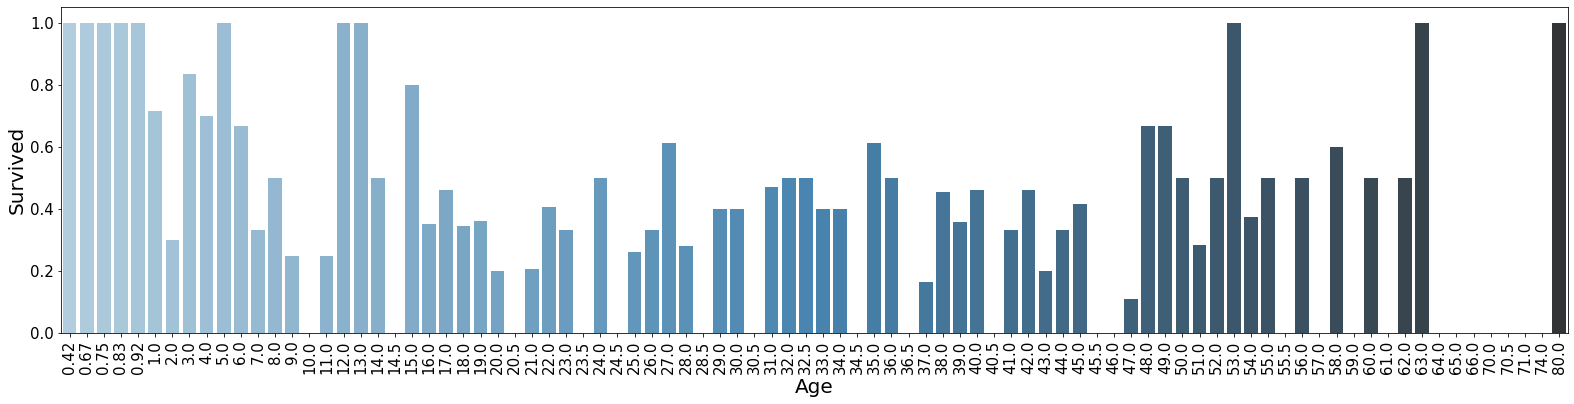

In [107]:
plt.figure(figsize=(27,6))
sns.barplot(train_df['Age'],train_df['Survived'], ci=None,  palette="Blues_d")
plt.xticks(rotation=90)
plt.show()

# With a little bit of creativity, we can say that the plot has 3 regions:

~*Child*  - between age 0 to 15    
~*Adult*  - between age 15 to 48     
~*Elder*  - between age 48 to 80    
  
  
  


You don't have to imagine, I'll help see that..

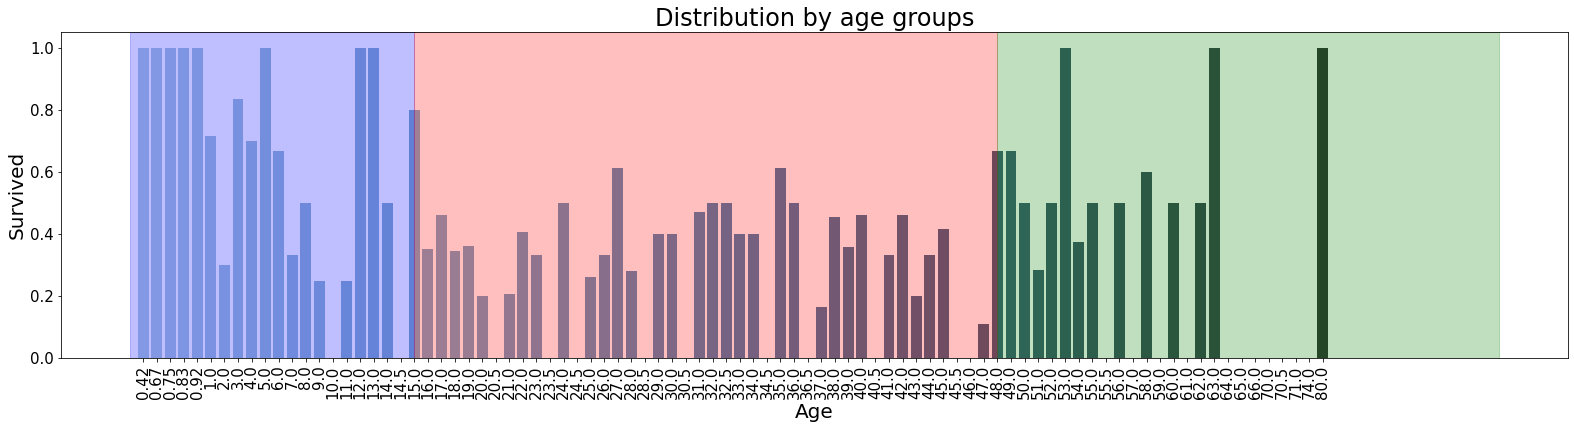

In [108]:
limit_1 = 15
limit_2 = 48
x_limit_1 = np.size(train_df[train_df['Age'] < limit_1]['Age'].unique())
x_limit_2 = np.size(train_df[train_df['Age'] < limit_2]['Age'].unique())

plt.figure(figsize=(27,6))
sns.barplot(train_df['Age'],train_df['Survived'], ci=None,  palette="Blues_d")
plt.axvspan(-1, x_limit_1, alpha=0.25, color='blue')
plt.axvspan(x_limit_1, x_limit_2, alpha=0.25, color='red')
plt.axvspan(x_limit_2, 100, alpha=0.25, color='green')
plt.title('Distribution by age groups')
plt.xticks(rotation=90)
plt.show()

The new groups we divided:

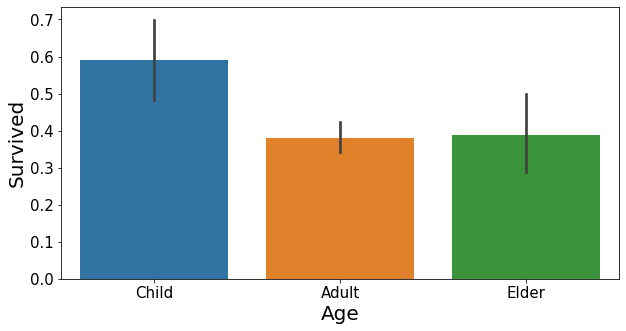

In [109]:

train_df['Age'] = pd.cut(train_df['Age'], bins=[0, 15, 48, 200], labels=['Child','Adult','Elder'])
train_df['Age'].head()
plt.figure(figsize=(10,5))
sns.barplot(train_df['Age'], train_df['Survived']);


In [110]:
test_df['Age'] = pd.cut(test_df['Age'], bins=[0, 15, 48, 200], labels=['Child','Adult','Elder'])


The plot shows that children have a higher survival rate.   
This may hint on the posibility that children and infants were the priority.  
We don't see a significant difference between the categories 'Adult' and 'Elder'.

###**3e. SibSp and Survived**



---



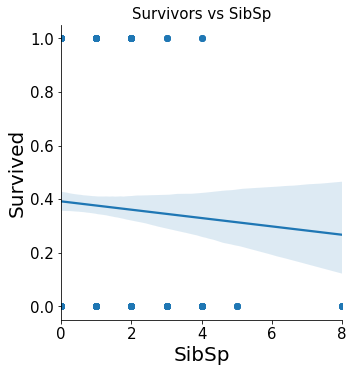

In [111]:
sns.lmplot(x="SibSp", y="Survived", data=train_df, order=1)
plt.ylabel('Survived')
plt.xlabel('SibSp')
plt.title('Survivors vs SibSp', fontsize = 15)
plt.show()

*Negative correlation*  
People who came with relatives survived less.


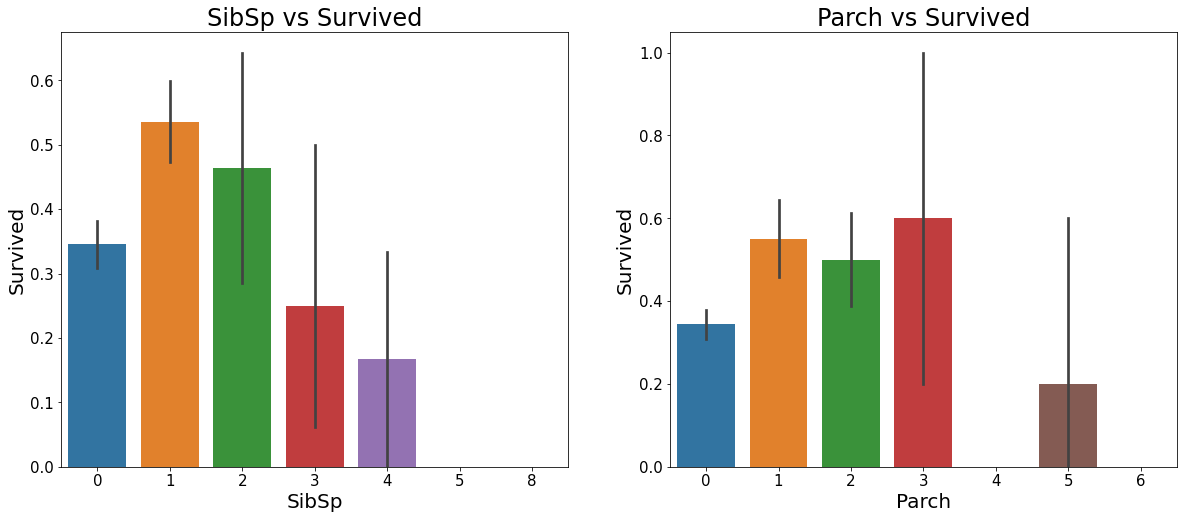

In [112]:
f,ax=plt.subplots(1,2,figsize=(20,8))
plt.rcParams["font.size"] = 20
sns.barplot('SibSp','Survived',data=train_df,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.barplot('Parch','Survived',data=train_df,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

Survival rate was higher for Parch&SibSp 1 to 3 and was very low for Parch 4 to 6.
Mayby the resason is responsibility for more people.



There is one point I would like to make clear from another position.
We can see that passengers who were alone had less chance of survival. Mayby the resason for this is that no one along with them to help them out.

#4. Correlation between feature in a Heatmap🔥

---




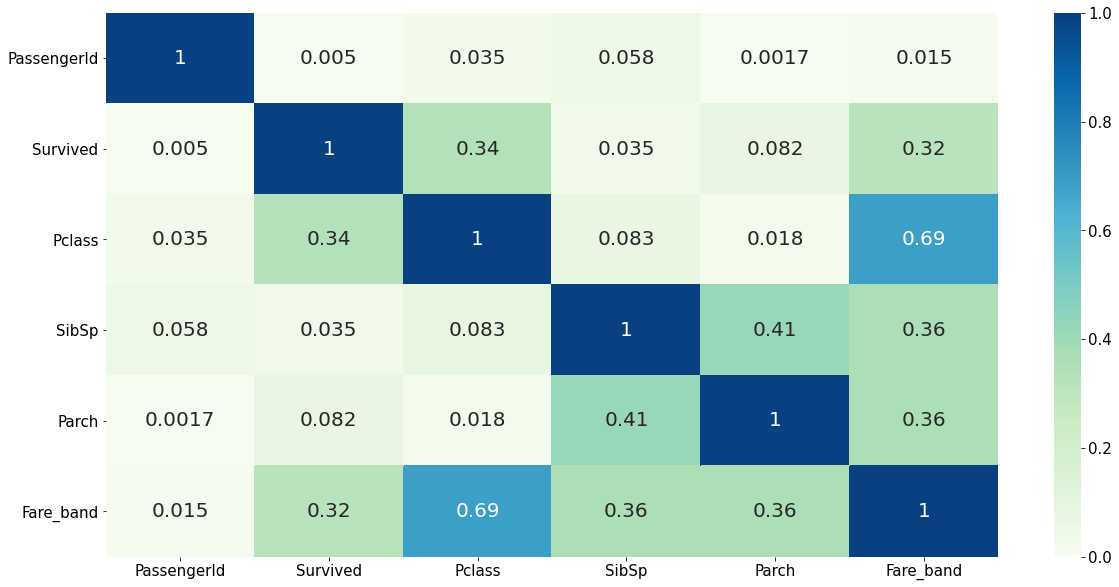

In [113]:
plt.figure(figsize=(20,10))
cor = np.abs(train_df.corr())
train_df.corr()
sns.heatmap(cor, annot=True, cmap = plt.cm.GnBu, vmin=0, vmax=1)
plt.show()

Absolute Correlation Features:  
~Fare_band and Pclass: |0.69|   
~Parch and SibSp: |0.41| 
~Fare_band and SibSp: |0.36|  
~Fare_band and Parch: |0.36|    
~Pclass and Survived: |0.34|     
~Fare and Survived: |0.32|    



#5. Classification

---



In [114]:
train_df['Sex'].replace(['male','female'],[0,1],inplace=True)
train_df['Embarked'].replace(['C','S', 'Q'],[0,1,2],inplace=True)
train_df['Age'].replace([np.NaN,'Child','Adult', 'Elder'],[0, 1, 2, 3],inplace=True)

In [115]:
test_df['Sex'].replace(['male','female'],[0,1],inplace=True)
test_df['Embarked'].replace(['C','S', 'Q'],[0,1,2],inplace=True)
test_df['Age'].replace([np.NaN,'Child','Adult', 'Elder'],[0,1, 2, 3],inplace=True)

In [116]:
train_df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Embarked       False
Fare_band      False
dtype: bool

In [117]:
test_df.isna().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Embarked       False
Fare_band      False
dtype: bool

In [118]:
train_df.drop(['Ticket', 'Name'] ,axis=1, inplace=True)
test_df.drop(['Ticket', 'Name'] ,axis=1, inplace=True)

In [119]:
# detach the target values from the input data
t = train_df['Survived']
X = train_df.drop('Survived', axis=1)
print('X')
display(X)
print()
print('t')
display(t)

X


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_band
0,1,3,0,2,1,0,1,0
1,2,1,1,2,1,0,0,5
2,3,3,1,2,0,0,1,1
3,4,1,1,2,1,0,1,5
4,5,3,0,2,0,0,1,1
...,...,...,...,...,...,...,...,...
886,887,2,0,2,0,0,1,2
887,888,1,1,2,0,0,1,4
888,889,3,1,0,1,2,1,3
889,890,1,0,2,0,0,0,4



t


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Split the data to 80% train and 20% test

In [120]:
from sklearn import model_selection
X_train, X_val, t_train, t_val = model_selection.train_test_split(X, t, test_size=0.2, random_state=2)
print('X_train')
display(X_train)
print()
print('t_train')
display(t_train)
print()
print('X_val')
display(X_val)
print()
print('t_val')
display(t_val)

X_train


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_band
30,31,1,0,2,0,0,0,4
10,11,3,1,1,1,1,1,3
873,874,3,0,2,0,0,1,2
182,183,3,0,1,4,2,1,4
876,877,3,0,2,0,0,1,2
...,...,...,...,...,...,...,...,...
534,535,3,1,2,0,0,1,2
584,585,3,0,0,0,0,0,2
493,494,1,0,3,0,0,0,4
527,528,1,0,0,0,0,1,5



t_train


30     0
10     1
873    0
182    0
876    0
      ..
534    0
584    0
493    0
527    0
168    0
Name: Survived, Length: 712, dtype: int64


X_val


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_band
707,708,1,0,2,0,0,1,4
37,38,3,0,2,0,0,1,1
615,616,2,1,2,1,2,1,5
169,170,3,0,2,0,0,1,5
68,69,3,1,2,4,2,1,1
...,...,...,...,...,...,...,...,...
89,90,3,0,2,0,0,1,1
80,81,3,0,2,0,0,1,2
846,847,3,0,0,8,2,1,5
870,871,3,0,2,0,0,1,1



t_val


707    1
37     0
615    1
169    0
68     1
      ..
89     0
80     0
846    0
870    0
251    0
Name: Survived, Length: 179, dtype: int64

SGD_cls.score

---



In [121]:
# create the SGDClassifier and predict the probabilities of the train and test data
from sklearn import pipeline
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import model_selection
SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01)).fit(X_train, t_train)
y_train_prob = SGD_cls.predict_proba(X_train)
y_test_prob = SGD_cls.predict_proba(X_val)
y_train = SGD_cls.predict(X_train)
y_test = SGD_cls.predict(X_val)
print('first 5 probabilities of y_train_prob:')
print(y_train_prob[:5])
print()
print('first 5 predictions of y_train:')
print(y_train[:5])
print()
print('first 5 probabilities of y_test_prob:')
print(y_test_prob[:5])
print()
print('first 5 predictions of y_test:')
print(y_test[:5])

first 5 probabilities of y_train_prob:
[[0.59141294 0.40858706]
 [0.39670341 0.60329659]
 [0.8845898  0.1154102 ]
 [0.97146196 0.02853804]
 [0.88448908 0.11551092]]

first 5 predictions of y_train:
[0 1 0 0 0]

first 5 probabilities of y_test_prob:
[[0.5786211  0.4213789 ]
 [0.9297879  0.0702121 ]
 [0.19174742 0.80825258]
 [0.81031823 0.18968177]
 [0.85264878 0.14735122]]

first 5 predictions of y_test:
[0 0 1 0 0]


In [122]:
from sklearn import metrics
print('Accuracy score on train', SGD_cls.score(X_train, t_train))
print('Accuracy score on test', SGD_cls.score(X_val, t_val))
print()
print('CE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on test', metrics.log_loss(t_val, y_test_prob))

Accuracy score on train 0.7991573033707865
Accuracy score on test 0.7486033519553073

CE on train 0.4399560814671411
CE on test 0.514585664375355


LogisticRegression

---



In [123]:
linear_model.LogisticRegression()
from sklearn import pipeline
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import model_selection
SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.LogisticRegression()).fit(X_train, t_train)
y_train_prob = SGD_cls.predict_proba(X_train)
y_test_prob = SGD_cls.predict_proba(X_val)
y_train = SGD_cls.predict(X_train)
y_test = SGD_cls.predict(X_val)
print('first 5 probabilities of y_train_prob:')
print(y_train_prob[:5])
print()
print('first 5 predictions of y_train:')
print(y_train[:5])
print()
print('first 5 probabilities of y_test_prob:')
print(y_test_prob[:5])
print()
print('first 5 predictions of y_test:')
print(y_test[:5])

first 5 probabilities of y_train_prob:
[[0.60379574 0.39620426]
 [0.39752898 0.60247102]
 [0.87445268 0.12554732]
 [0.97133925 0.02866075]
 [0.87432436 0.12567564]]

first 5 predictions of y_train:
[0 1 0 0 0]

first 5 probabilities of y_test_prob:
[[0.57147437 0.42852563]
 [0.92713181 0.07286819]
 [0.19293711 0.80706289]
 [0.79966924 0.20033076]
 [0.86066632 0.13933368]]

first 5 predictions of y_test:
[0 0 1 0 0]


In [124]:
from sklearn import metrics
print('Accuracy score on train', SGD_cls.score(X_train, t_train))
print('Accuracy score on test', SGD_cls.score(X_val, t_val))
print()
print('CE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on test', metrics.log_loss(t_val, y_test_prob))

Accuracy score on train 0.797752808988764
Accuracy score on test 0.7486033519553073

CE on train 0.4398254953194317
CE on test 0.5139265322818273


MLPClassifier

---



In [125]:
# import neural_network and run MLP on the data
from sklearn import neural_network
MLP_cls = neural_network.MLPClassifier(activation='logistic', solver='sgd', alpha=0, max_iter=10000).fit(X_train, t_train)
y_train_prob = MLP_cls.predict_proba(X_train)
y_test_prob = MLP_cls.predict_proba(X_val)
print('Accuracy score on train', MLP_cls.score(X_train, t_train))
print('Accuracy score on test', MLP_cls.score(X_val, t_val))
print()
print('CE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on test', metrics.log_loss(t_val, y_test_prob))

Accuracy score on train 0.6306179775280899
Accuracy score on test 0.5586592178770949

CE on train 0.6556183908417761
CE on test 0.69657272454569


In [126]:

test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_band
0,892,3,0,2,0,0,2,1
1,893,3,1,2,1,0,1,0
2,894,2,0,3,0,0,2,2
3,895,3,0,2,0,0,1,2
4,896,3,1,2,1,1,1,2
...,...,...,...,...,...,...,...,...
413,1305,3,0,0,0,0,1,1
414,1306,1,1,2,0,0,0,5
415,1307,3,0,2,0,0,1,0
416,1308,3,0,0,0,0,1,1


In [127]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_band
0,1,0,3,0,2,1,0,1,0
1,2,1,1,1,2,1,0,0,5
2,3,1,3,1,2,0,0,1,1
3,4,1,1,1,2,1,0,1,5
4,5,0,3,0,2,0,0,1,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,2,0,0,1,2
887,888,1,1,1,2,0,0,1,4
888,889,0,3,1,0,1,2,1,3
889,890,1,1,0,2,0,0,0,4


#6. My submission

---

In [128]:
passenger_id = test_df['PassengerId'].values
y_test = SGD_cls.predict(test_df)
submission = pd.DataFrame({ 'PassengerId': passenger_id, 'Survived':y_test})
submission.to_csv("submission.csv", index=False)

![image](https://user-images.githubusercontent.com/49269120/99592197-8da59780-29f8-11eb-86fd-0642d384445f.png)

![image](https://user-images.githubusercontent.com/49269120/99592310-b9c11880-29f8-11eb-9f9f-ef42e6a1368e.png)


![image](https://user-images.githubusercontent.com/49269120/99592434-e37a3f80-29f8-11eb-908e-134054c048a1.png)



#7. References

---


https://www.kaggle.com/masumrumi/a-statistical-analysis-ml-workflow-of-titanic#Part-4:-Statistical-Overview

https://www.kaggle.com/pmarcelino/data-analysis-and-feature-extraction-with-python

https://www.kaggle.com/vikumsw/beginners-basic-workflow-introduction

https://www.kaggle.com/pavlofesenko/simplest-top-10-titanic-0-80861

https://www.kaggle.com/c/titanic/data - for data of the competition  

https://www.kaggle.com/c/titanic/notebooks - kaggle's notebooks  

https://seaborn.pydata.org/tutorial - for functions, graphs, style and colors  

https://matplotlib.org/3.1.0/tutorials/index.html - for functions, graphs, style and colors  
